# Monty Hall

In a TV show, there are 3 doors. One of them contains a prize. 
The participant is asked to choose a door.<br />
The host opens another one, showing that there is not the prize.
Then, the host lets the partecipant the possibility of changing doors.
In the following, the statistics according to the participant behaviour is analysed, specifically:
<br />
 - conservative : the participant chooses not to change the door initially picked.
 - switch : the patecipant chooses to change the door
<br />


Moreover, it is analised the statistics referring to a new partecipant who doesn't know the about the previous interaction and needs to choose a door between the last 2 closed.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [7]:

def MontyHall(N_doors, N_iterations):
    #Participants
    conservative=0
    switcher=0
    newcomer=0

    for i in range(N_iterations):
        #Initialize doors
        doors=np.zeros(N_doors)
        doors_index = np.arange(0,N_doors,1)
        
        #Hiding the car
        #doors: 0->goat , 1->car
        car_index = randrange(0,N_doors,1)
        doors[car_index]=1
        
        #Choice

        #Initial
        choice_initial = randrange(0,N_doors,1)
        
        
        #
        for i in range(len(doors)):
            #Last turn: exit for loop
            if len(doors_index)==2:
                break
            #Open door : remove index in doors_index
            elif i!=choice_initial and doors[i]==0:
                ind = np.where(doors_index==i)
                doors_index = np.delete(doors_index,ind )
        
        #On last turn
        for i in doors_index:
            if i!=choice_initial:
                choice_alt=i


        #Final choices
        c_choice=choice_initial
        sw_choice=choice_alt
        newc_choice=np.random.choice([choice_initial,choice_alt])
        
        #print('conservative: ',c_choice)
        #print('switcher: ', sw_choice)
        #print('newcom: ', newc_choice)

        
        #Winners
        if c_choice == car_index:
            conservative+=1
        if sw_choice == car_index:
            switcher+=1
        if newc_choice == car_index:
            newcomer+=1
    return conservative/N_iterations, switcher/N_iterations, newcomer/N_iterations


In [8]:
conservative_3, switcher_3, newcomer_3 = MontyHall(3, 10000)

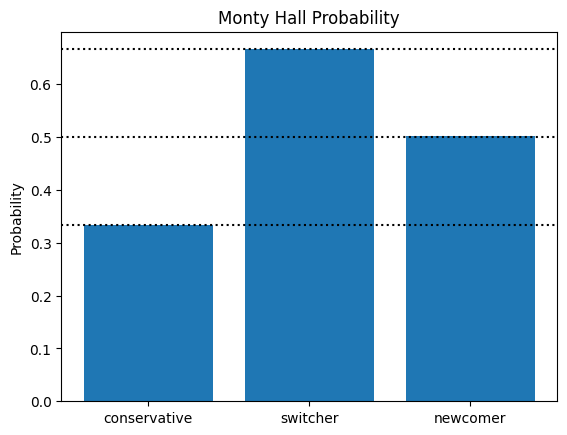

In [9]:
#Bar
fig, ax = plt.subplots()
ax.bar(['conservative', 'switcher','newcomer'],[conservative_3,switcher_3,newcomer_3])
#ax.grid()
#ax.legend()
ax.set_title('Monty Hall Probability')
ax.set_ylabel('Probability')

for y in [1/3,1/2,2/3]:
    plt.axhline(y, ls='dotted',c='black')

In [10]:
conservative_100, switcher_100, newcomer_100 = MontyHall(100, 10000)

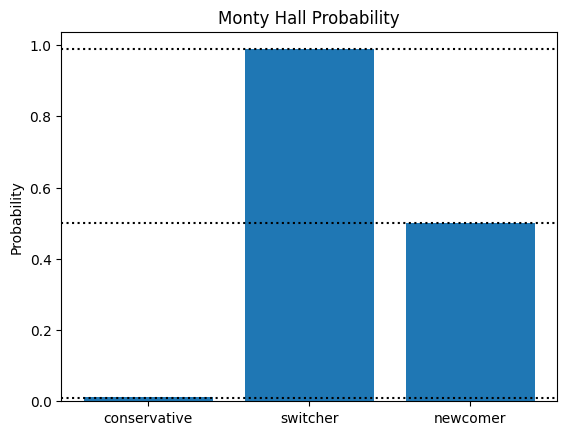

In [11]:
#Bar
fig, ax = plt.subplots()
ax.bar(['conservative', 'switcher','newcomer'],[conservative_100,switcher_100,newcomer_100])
#ax.grid()
#ax.legend()
ax.set_title('Monty Hall Probability')
ax.set_ylabel('Probability')

for y in [1/100,99/100,1/2]:
    plt.axhline(y, ls='dotted',c='black')

> **What happens changing the number of doors?**
I.e. 100 doors 
The conservative woul still have 1/100 probability
The switcher sticks to the 'remaining' probability of 99/100
The newcomer chooses as always as a 'coin' therefore 1/2
